In [2]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [3]:
df, df_cv = utils.Utils.load_data()

c:\Uni\5. Semester\NLP\NLP-CrowdFlow\src\utils\utils.py:61: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + config.TRAIN_SET)


In [4]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [11]:
y_pred = []

for idx, row in tqdm.tqdm(df.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df["y_pred"] = y_pred

Predicting sentiment: 30it [00:03,  9.84it/s]


In [ ]:
df.head()

,id,created_at,text,label,y_pred
0,1.0,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,NaN,"{'label': 'neutral', 'score': 0.5366051197052002}"
1,2.0,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,NaN,"{'label': 'positive', 'score': 0.8539708852767..."
2,3.0,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,NaN,"{'label': 'positive', 'score': 0.8298921585083..."
3,4.0,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,NaN,"{'label': 'negative', 'score': 0.9511143565177..."
4,5.0,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,NaN,"{'label': 'neutral', 'score': 0.7607879042625427}"


In [6]:
df["pred_sentiment"] = df["y_pred"].apply(lambda x: x["label"])
df["pred_sentiment"] = df["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df.head(35)

,id,created_at,text,label,y_pred,pred_sentiment
0,1.0,2020-04-09 23:59:51+00:00,@KennyDegu very very little volume. With $10T ...,NaN,"{'label': 'neutral', 'score': 0.5366051197052002}",neutral
1,2.0,2020-04-09 23:58:55+00:00,#ES_F achieved Target 2780 closing above 50% #...,NaN,"{'label': 'positive', 'score': 0.8539708852767...",positive
2,3.0,2020-04-09 23:58:52+00:00,RT @KimbleCharting: Silver/Gold indicator crea...,NaN,"{'label': 'positive', 'score': 0.8298921585083...",positive
3,4.0,2020-04-09 23:58:27+00:00,@Issaquahfunds Hedged our $MSFT position into ...,NaN,"{'label': 'negative', 'score': 0.9511143565177...",negative
4,5.0,2020-04-09 23:57:59+00:00,RT @zipillinois: 3 Surprisingly Controversial ...,NaN,"{'label': 'neutral', 'score': 0.7607879042625427}",neutral
5,6.0,2020-04-09 23:57:33+00:00,RT @Crypto____World: ðŸ‡¿ðŸ‡¼ZIMBABWEðŸ‡¿ðŸ‡¼\...,NaN,"{'label': 'neutral', 'score': 0.806425929069519}",neutral
6,7.0,2020-04-09 23:57:27+00:00,Pfizer Shares Acquired by Ipswich Investment M...,NaN,"{'label': 'neutral', 'score': 0.9411388635635376}",neutral
7,10.0,2020-04-09 23:57:08+00:00,RT @NorthmanTrader: I repeat: The Fed is reckl...,NaN,"{'label': 'negative', 'score': 0.5649538636207...",negative
8,12.0,2020-04-09 23:57:01+00:00,S&amp;P 500 | $SPX | $SPX500 $USD\n\nlong term...,NaN,"{'label': 'neutral', 'score': 0.9144512414932251}",neutral
9,13.0,2020-04-09 23:56:58+00:00,RT @TDANetwork: ðŸ“½ï¸ #TheWatchList panel as...,NaN,"{'label': 'neutral', 'score': 0.9230145215988159}",neutral


In [ ]:
cm = confusion_matrix(df["label"], df["pred_sentiment"], labels=config.SENTIMENTS, normalize="true")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=config.SENTIMENTS)
disp.plot(cmap=plt.cm.Blues)

c:\Users\ykoenigstein\AppData\Local\anaconda3\envs\DHBW-NLP-CrowdFlow\Lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

# FEIN BERT Active Learning

In [1]:
import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [2]:
df_all, df_cv = utils.Utils.load_data()
# df_all = df_all.sample(n=5000, random_state=config.RANDOM_STATE)
df_all = df_all[:100000]
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  float64
 1   created_at  100000 non-null  object 
 2   text        100000 non-null  object 
 3   label       0 non-null       float64
dtypes: float64(2), object(2)
memory usage: 3.1+ MB


c:\Uni\5. Semester\NLP\NLP-CrowdFlow\src\utils\utils.py:61: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_dir + config.TRAIN_SET)


In [3]:
pipe = pipeline("text-classification", model="ProsusAI/finbert")

In [4]:
y_pred = []

for idx, row in tqdm.tqdm(df_all.iterrows(), desc="Predicting sentiment"):
    try:
        result = pipe(
            {"text": row["text"]},
            truncation=True  
        )
        y_pred.append(result)
    except Exception as e:
        print(idx, "|", e, "|", row["text"])
        y_pred.append({"label": "N/A"})
    
df_all["y_pred"] = y_pred

Predicting sentiment: 100000it [2:20:32, 11.86it/s]


In [5]:
df_all["pred_sentiment"] = df_all["y_pred"].apply(lambda x: x["label"])
df_all["label"] = df_all["pred_sentiment"].replace({"POS": "positive", "NEU": "neutral", "NEG": "negative"})
df_all.tail()

,id,created_at,text,label,y_pred,pred_sentiment
99995,101583.0,2020-04-17 13:52:06+00:00,$COMP $DJIA $SPX:\n\nKey Words: Man who warned...,neutral,"{'label': 'neutral', 'score': 0.912977397441864}",neutral
99996,101584.0,2020-04-17 13:52:04+00:00,For some reason Nikkei can't find a bid. Gener...,negative,"{'label': 'negative', 'score': 0.7437336444854...",negative
99997,101585.0,2020-04-17 13:51:58+00:00,$amzn they are going to pocket major premiums ...,neutral,"{'label': 'neutral', 'score': 0.5929485559463501}",neutral
99998,101586.0,2020-04-17 13:51:56+00:00,"RT @GoingGreenPicks: $HTSC, Cannabis business ...",neutral,"{'label': 'neutral', 'score': 0.9189187288284302}",neutral
99999,101587.0,2020-04-17 13:51:53+00:00,So Portage $PBT.U can FINALLY be bought over t...,neutral,"{'label': 'neutral', 'score': 0.757339358329773}",neutral


In [6]:
df_all.to_csv(r"../res/prepared/ieee_AL_50.csv", index=False)

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import tqdm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from transformers import pipeline

from utils import config, utils

In [14]:
df_all, df_cv = utils.Utils.load_data(drop_neutral=False)
df_all.tail()

,id,created_at,text,label,y_pred,pred_sentiment
99995,101583.0,2020-04-17 13:52:06+00:00,$COMP $DJIA $SPX:\n\nKey Words: Man who warned...,neutral,"{'label': 'neutral', 'score': 0.912977397441864}",neutral
99996,101584.0,2020-04-17 13:52:04+00:00,For some reason Nikkei can't find a bid. Gener...,negative,"{'label': 'negative', 'score': 0.7437336444854...",negative
99997,101585.0,2020-04-17 13:51:58+00:00,$amzn they are going to pocket major premiums ...,neutral,"{'label': 'neutral', 'score': 0.5929485559463501}",neutral
99998,101586.0,2020-04-17 13:51:56+00:00,"RT @GoingGreenPicks: $HTSC, Cannabis business ...",neutral,"{'label': 'neutral', 'score': 0.9189187288284302}",neutral
99999,101587.0,2020-04-17 13:51:53+00:00,So Portage $PBT.U can FINALLY be bought over t...,neutral,"{'label': 'neutral', 'score': 0.757339358329773}",neutral


In [15]:
df_cv.head()

,date,source,subject,text,title,label,polarity,subjectivity,url,Hyperlink,Unnamed: 8
0,2023-04-05 06:52:00,CoinTelegraph,defi,The compensation process is expected to start ...,Allbridge to first begin repaying stuck bridge...,negative,-0.03,0.20,NaN,NaN,NaN
1,2023-04-05 06:19:00,CryptoPotato,bitcoin,On-chain analytics revealed a sentiment shift ...,Bitcoin Hodl Patterns Indicate Cycle Shift to ...,neutral,0.00,0.00,NaN,NaN,NaN
2,2023-04-05 05:09:00,CoinTelegraph,bitcoin,"Ether has broken the $1,900 resistance level f...",ETH hits 7-month high ahead of Shanghai and Ca...,negative,-0.04,0.31,NaN,NaN,NaN
3,2023-04-05 01:09:00,CoinTelegraph,bitcoin,"With a new quarterly production record, Marath...","Marathon Digital posts quarterly record of 2,1...",positive,0.07,0.23,NaN,NaN,NaN
4,2023-04-04 23:49:00,CryptoPotato,altcoin,The stablecoin BTG Dol will supposedly become ...,Brazilian Finance Giant BTG Pactual to Issue a...,positive,0.40,0.40,NaN,NaN,NaN


In [16]:
nltk_svc_w2v_model_1 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_1"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  32.3s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 6.0min
Classification Report for nltk_svc_w2v_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.61      0.84      0.70      3079
     neutral       0.95      0.79      0.86     13991
    positive       0.58      0.83      0.68      2930

    accuracy                           0.80     20000
   macro avg       0.71      0.82      0.75     20000
weighted avg       0.84      0.80      0.81     20000

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.44      0.52      0.48       600
     neutral       0.48      0.55      0.51       901
    positive       0.58      0.44      0.50       949

    accuracy                           0.50      2450
   macro avg       0.50      0.50      0.50      2450
we

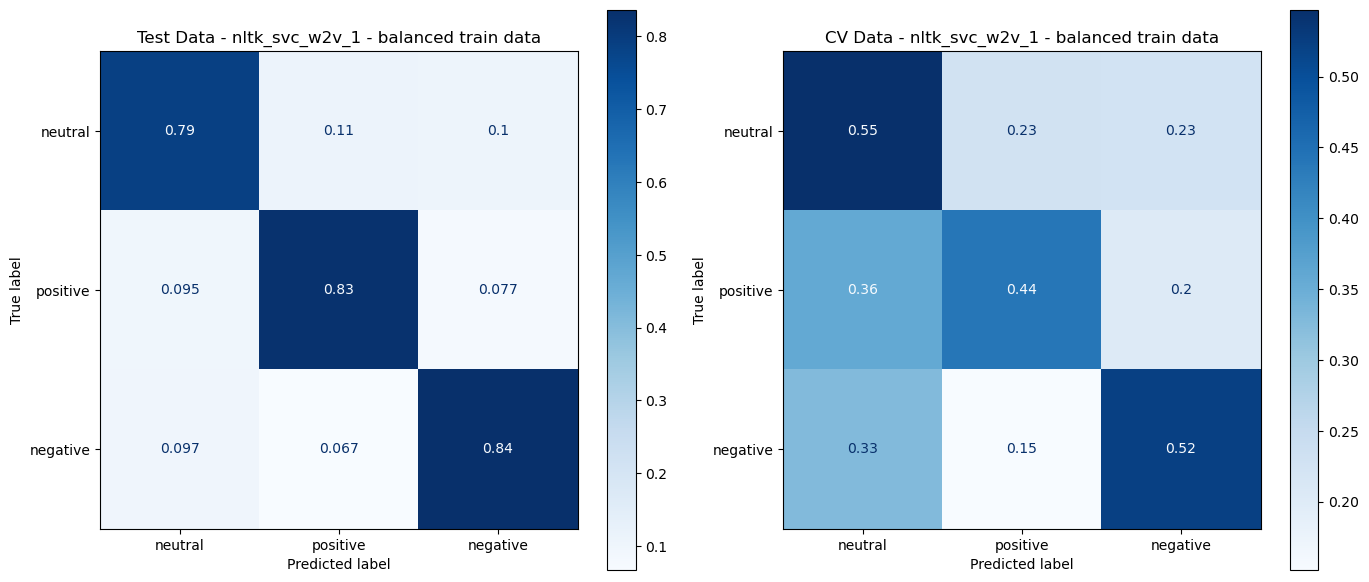

In [17]:
nltk_svc_w2v_model_1.fit(True)
nltk_svc_w2v_model_1.evaluate(True)

In [18]:
nltk_svc_w2v_model_2 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_2"
)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  34.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total= 6.1min
Classification Report for nltk_svc_w2v_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.59      0.82      0.69      3079
     neutral       0.95      0.78      0.85     13991
    positive       0.56      0.80      0.66      2930

    accuracy                           0.79     20000
   macro avg       0.70      0.80      0.73     20000
weighted avg       0.83      0.79      0.80     20000

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.44      0.55      0.49       600
     neutral       0.49      0.54      0.51       901
    positive       0.59      0.44      0.51       949

    accuracy                           0.50      2450
   macro avg       0.51      0.51      0.50      2450
we

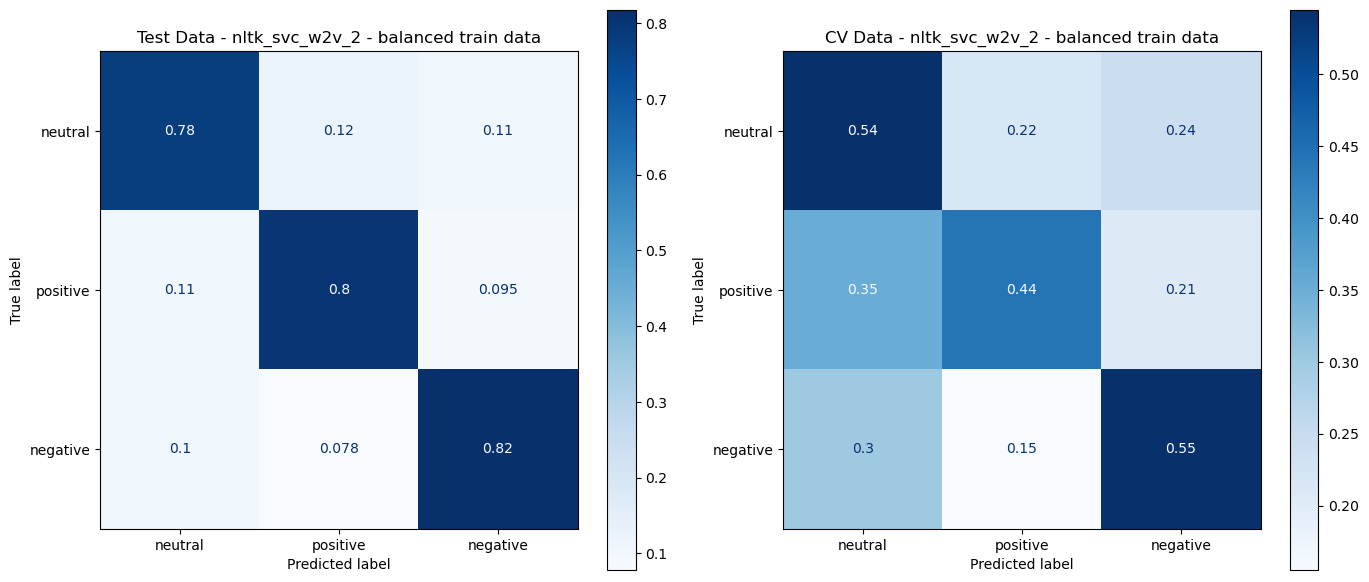

In [19]:
nltk_svc_w2v_model_2.fit(True)
nltk_svc_w2v_model_2.evaluate(True)

In [22]:
nltk_svc_w2v_model_3 = utils.CustomPipeline(
    df_all,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_svc_w2v_3"
)

In [ ]:
nltk_svc_w2v_model_3.fit(True)
nltk_svc_w2v_model_3.evaluate(True)